In [60]:
import ACAgraphML
import torch
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%load_ext autoreload
%autoreload 2

ACAgraphML.test()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
lol


In [39]:
from ACAgraphML.Dataset import ZINC_Dataset

dataset = ZINC_Dataset.SMALL_TRAIN.load()

dataset.print_summary()
print("# Node Features:", dataset.num_node_features)
print("# Edge Features:", dataset.num_edge_features)


100%|██████████| 10000/10000 [00:01<00:00, 6282.04it/s]

ZINC (#graphs=10000):
+------------+----------+----------+
|            |   #nodes |   #edges |
|------------+----------+----------|
| mean       |     23.2 |     49.9 |
| std        |      4.5 |     10.6 |
| min        |      9   |     16   |
| quantile25 |     20   |     42   |
| median     |     23   |     50   |
| quantile75 |     26   |     56   |
| max        |     37   |     82   |
+------------+----------+----------+
# Node Features: 1
# Edge Features: 1


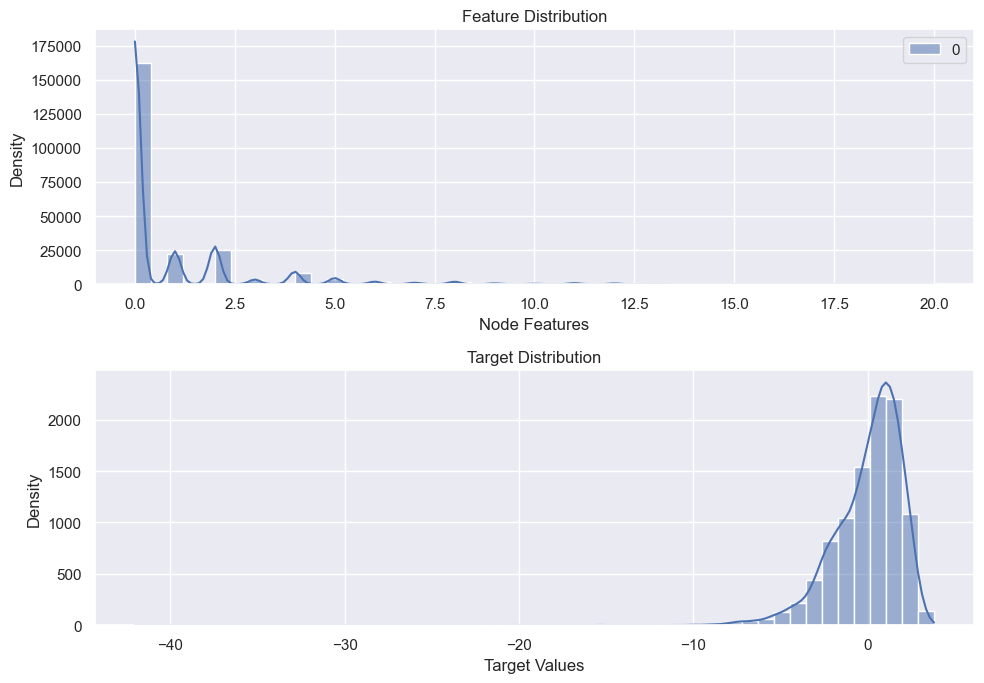

In [73]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.title("Feature Distribution")
sns.histplot(dataset.x, bins=50, kde=True)
plt.xlabel("Node Features")
plt.ylabel("Density")
plt.subplot(2, 1, 2)
plt.title("Target Distribution")
sns.histplot(dataset.y, bins=50, kde=True)
plt.xlabel("Target Values")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [58]:
graph = dataset.get(2)
graph

Data(x=[16, 1], edge_index=[2, 34], edge_attr=[34], y=[1])

In [59]:
torch.max(dataset.x), torch.min(dataset.x)

(tensor(20), tensor(0))

c:\Polimi\Master\2Sem\ACA_GraphML_Project\.conda\Lib\site-packages\torch_geometric\data\in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


ValueError: 'c' argument has 231664 elements, which is inconsistent with 'x' and 'y' with size 29.

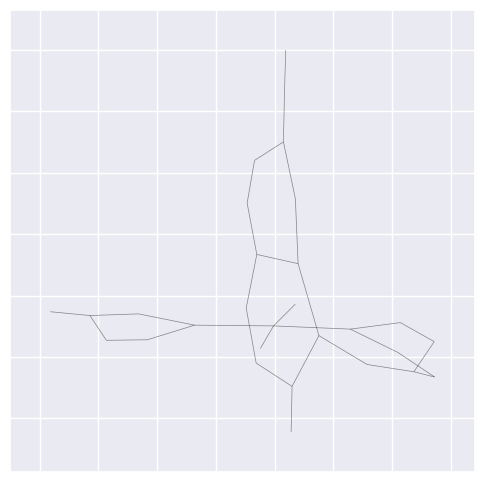

In [76]:
from ACAgraphML.Plotting import plot_graph_with_profile
plot_graph_with_profile(dataset)

In [44]:
import networkx as nx
from torch_geometric.utils import to_networkx
import numpy as np
import matplotlib.pyplot as plt

In [79]:
G = to_networkx(graph, to_undirected=True)

In [80]:
pos = nx.spring_layout(G, seed=42)

ValueError: Received invalid argument(s): node_vmin, node_vmax

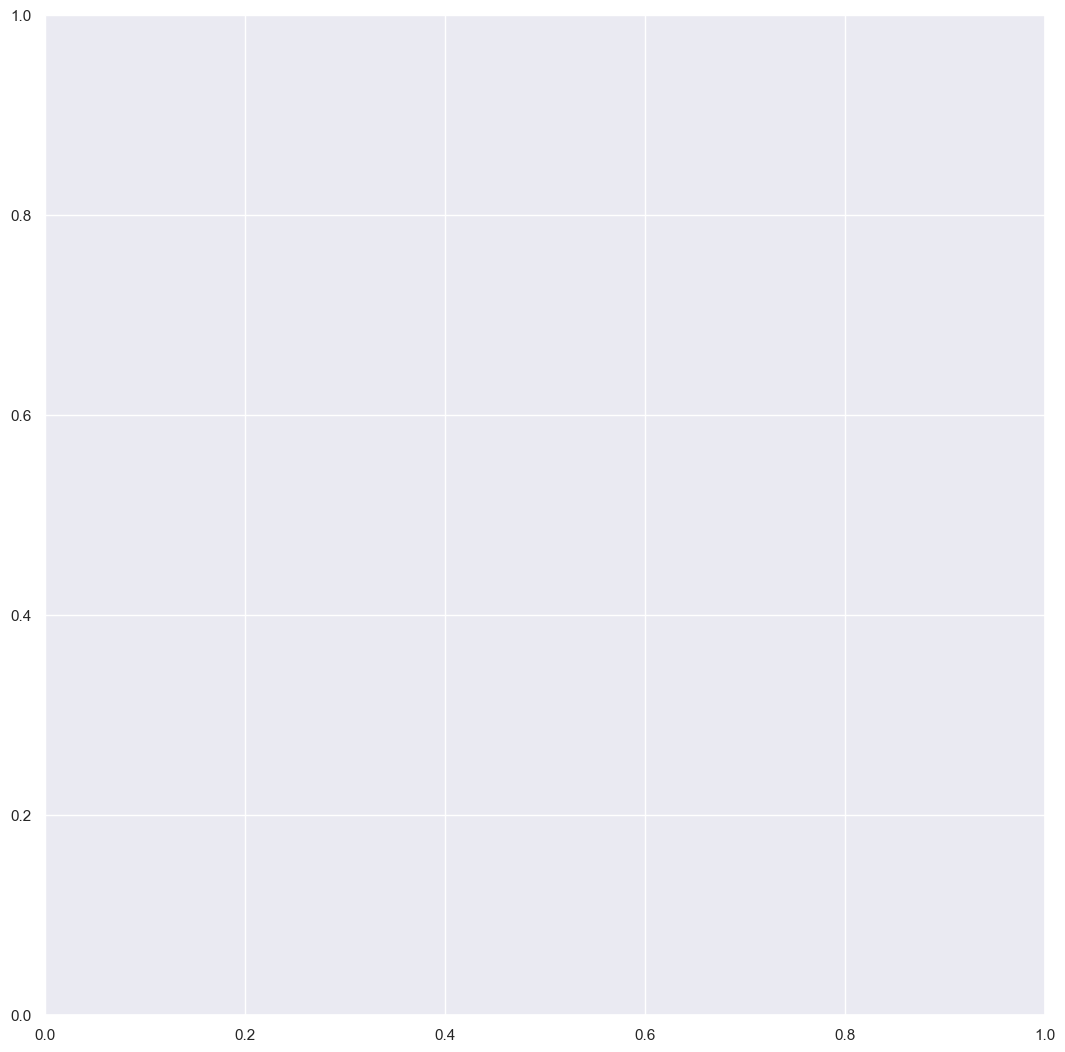

In [ ]:
#Plot the graph
plt.figure(figsize=(10, 10))
labels = {i: str(graph.x[i].item()) for i in G.nodes}
# Convert labels to integers for coloring
node_colors = [int(labels[node]) for node in G.nodes]
edge_labels = {(u, v): f"{graph.edge_attr[i].item()}" for i, (u, v) in enumerate(G.edges)}
edge_colors = [edge_labels[(u, v)] for u, v in G.edges]
# Convert edge_colors to numeric values for colormap
edge_colors_numeric = [float(c) for c in edge_colors]

# Draw the graph with colored nodes and edges
nx.draw(
    G,
    pos,
    with_labels=True,
    labels=labels,
    node_size=500,
    node_color=node_colors,
    cmap=plt.cm.viridis,
    font_size=10,
    font_color='white',
    edge_color=edge_colors_numeric,
    edge_cmap=plt.cm.cool
    )

# Draw edge labels separately
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black')
plt.title("Graph Visualization")
# Add colorbars for nodes and edges
sm_nodes = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm_nodes.set_array([])
cbar_nodes = plt.colorbar(sm_nodes, ax=plt.gca(), fraction=0.03, pad=0.08)
cbar_nodes.set_label('Node Label (as integer)')
plt.tight_layout()
plt.show()